## Импорт данных:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


data = pd.read_csv("california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


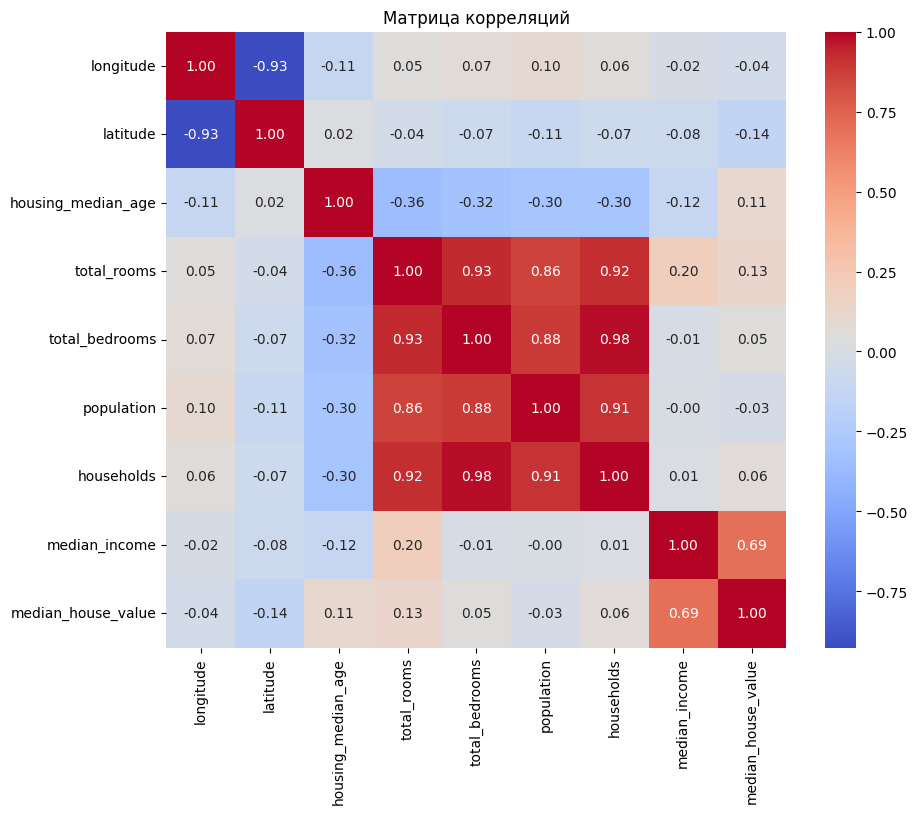

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

## Применяем обработку выбросов для ключевых столбцов


In [ ]:
def remove_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_filter = ['total_bedrooms', 'total_rooms', 'housing_median_age', 'median_house_value', 'housing_median_age', 'households']
for col in columns_to_filter:
    data = remove_outliers(data, col)

data

## Обучение модели:

In [25]:
encoded = pd.get_dummies(data)

X = encoded.drop(columns=["median_house_value"])
Y = encoded["median_house_value"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAE: 49915.76
MSE: 4607622287.23


## После удаления выбросов получились такие значения ошибки:

| Показатель | Было (До удаления выбросов) | Стало         |
|------------|---------------|---------------|
| MAE        | 49915.76      | 41838.95      |
| MSE        | 4607622287.23 | 3155025234.42 |

Удаление выбросов положительно сказалось на точности модели

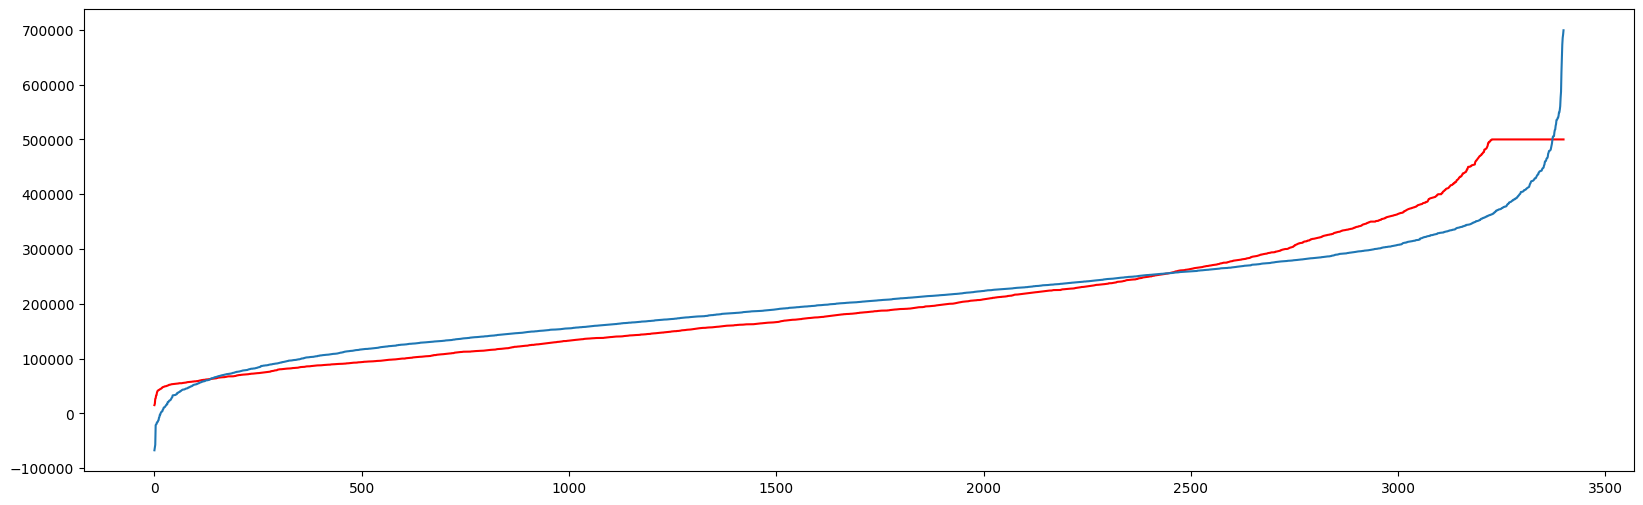

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(Y_test)), sorted(Y_test), color="r") # Тестовые значения
plt.plot(range(len(Y_pred)), sorted(Y_pred)) # Предсказанные значения
plt.show()